In [ ]:
!pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 24.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import wooldridge as woo

In [ ]:
price = woo.dataWoo('hprice2')

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     506 non-null    float64
 1   crime     506 non-null    float64
 2   nox       506 non-null    float64
 3   rooms     506 non-null    float64
 4   dist      506 non-null    float64
 5   radial    506 non-null    int64  
 6   proptax   506 non-null    float64
 7   stratio   506 non-null    float64
 8   lowstat   506 non-null    float64
 9   lprice    506 non-null    float64
 10  lnox      506 non-null    float64
 11  lproptax  506 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.6 KB


In [ ]:
price.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000.0,0.006,5.38,6.57,4.09,1,29.600000,15.300000,4.98,10.085809,1.682688,5.690360
1,21599.0,0.027,4.69,6.42,4.97,2,24.200001,17.799999,9.14,9.980402,1.545433,5.488938
2,34700.0,0.027,4.69,7.18,4.97,2,24.200001,17.799999,4.03,10.454495,1.545433,5.488938
3,33400.0,0.032,4.58,7.00,6.06,3,22.200001,18.700001,2.94,10.416311,1.521699,5.402678
4,36199.0,0.069,4.58,7.15,6.06,3,22.200001,18.700001,5.33,10.496787,1.521699,5.402678


In [ ]:
y = price['price']
x = price['rooms']
# price (y) é uma variável dependente, enquanto rooms (x) é uma variável independente. Isso porque queremos saber se o preço de um imóvel aumenta de acordo com a quantidade de quartos,
# ou seja, a variável preço (y) depende da variável rooms (x).

<Axes: >

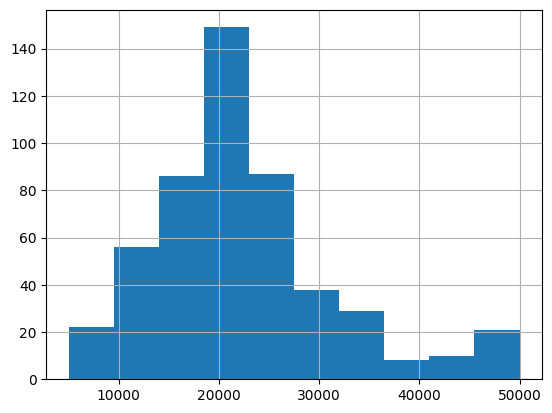

In [ ]:
y.hist()

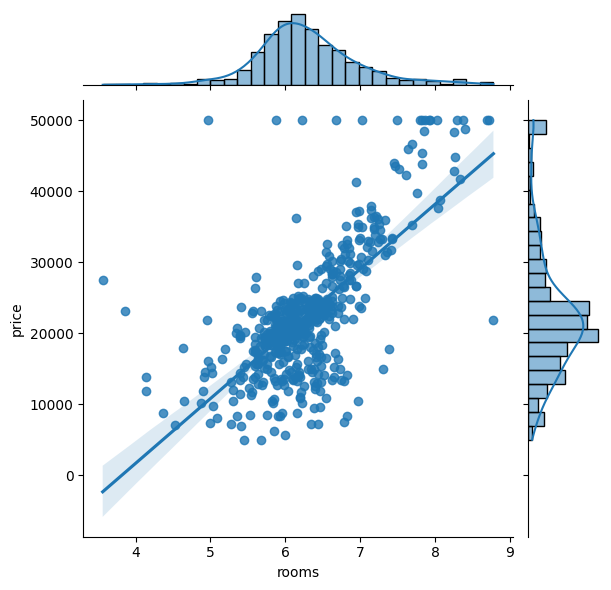

In [ ]:
sns.jointplot(data=price, x= 'rooms', y = 'price', kind='reg')

<Axes: >

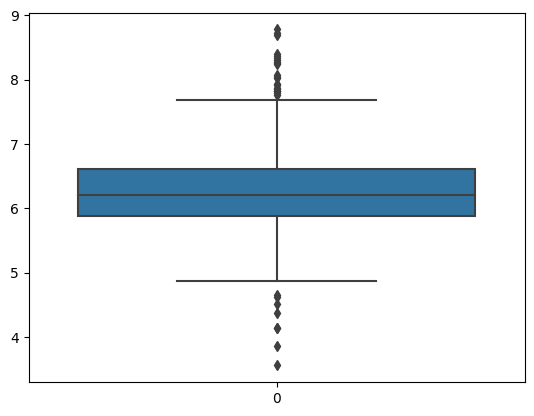

In [ ]:
sns.boxplot(x)

In [ ]:
reg = smf.ols(formula= 'price ~ rooms', data=price)
result1 = reg.fit()
result1.params

Intercept   -34796.200147
rooms         9119.548290
dtype: float64

In [ ]:
b0 =  -34796.200147
b1 = 9119.548290

**TESTES DO MODELO**





In [ ]:
#teste 1
x = 20
y = b0 + b1 * x
y

147594.765653

In [ ]:
#teste 2
x = 10
y = b0 + b1 * x
y

56399.282753

In [ ]:
#teste 3
x = 2
y = y = b0 + b1 * x
y

-16557.103567000002

**RESULTADO SOBRE O MODELO**

O modelo não é viável, observado a partir do teste em que, se x = 2, y < 0. Analisando os dados, é impossível que uma casa com dois quartos tenha um custo negativo.